The best way to learn an algorithm is to watch it in action. That is why I created the simplest non linear neural network in [Keras](http://keras.io) and trained it on the simplest non linear example. I learned way more on this that I expected. That is why I created some awesome visualization of how this simple network learns. I hope this helps people who want to get started with neural nets.

The data that we are going to predict is generated by a bilinear function that is `0` in the interval `[0, 1]` and has the value `x-1` on the interval `[1, 2]`.

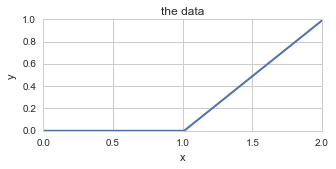

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_style('whitegrid')

n_points = 100
x = np.linspace(0, 2, n_points)
y = np.array([0] * int(n_points/2) + list(x[:50]))
plt.figure(figsize=(5, 2))
plt.plot(x, y, linewidth=2)
plt.title('the data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [2]:
'test'

'test'

## neural network magic

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import Callback
model = Sequential()

n_conn = 1
model.add(Dense(output_dim=n_conn, input_dim=1, init="glorot_normal"))
model.add(Activation("relu"))
#model.add(Dense(output_dim=1, init="glorot_normal"))

# from keras.optimizers import RMSprop
# opti = RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
# model.compile(loss='mean_squared_error', optimizer=opti)
model.compile(loss='mean_squared_error', optimizer='sgd')

X_train = np.array(x, ndmin=2).T
Y_train = np.array(y, ndmin=2).T

%matplotlib notebook
epochs = 10000
batch_size = 100
n_batches = n_points / batch_size

class PlotLoss(Callback):
    def on_train_begin(self, logs={}):
        fig, (ax1, ax2) = plt.subplots(2, 1)
        self.fig = fig
        self.ax1 = ax1
        ax1.set_xlim([0, n_batches * epochs])
        #ax1.set_ylim([0, 1])
        self.ax2 = ax2
        
        self.losses = []
        self.i = 0

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.i += 1
        if self.i % 500 == 0:        
            if len(self.ax1.lines):
                self.ax1.lines[0].set_xdata(range(len(self.losses)))
                self.ax1.lines[0].set_ydata(self.losses)
            else:
                self.ax1.plot(self.losses)
                self.ax1.set_title('training loss')
            self.fig.canvas.draw()
        
        if self.i % 500 == 0:        
            pred = model.predict(X_train)
            if len(self.ax2.lines):
                self.ax2.lines[0].set_xdata(x)
                self.ax2.lines[0].set_ydata(y)
                self.ax2.lines[1].set_xdata(x)
                self.ax2.lines[1].set_ydata(pred)
            else:
                self.ax2.plot(x, pred, label='prediction')
                self.ax2.plot(x, y, label='data')
                self.ax2.legend(loc='upper left')
            self.fig.canvas.draw()
            
loss = PlotLoss()
%time model.fit(X_train,
                Y_train,
                nb_epoch=epochs,
                batch_size=batch_size,
                verbose=0,
                callbacks=[loss])
%matplotlib inline

In [ ]:
pred = model.predict(X_train)
plt.plot(x, pred)
plt.plot(x, y)
pred

In [ ]:
from keras import backend as K

def get_layer_outoput(layer):
    return K.function([model.layers[0].input],
                      [model.layers[layer].get_output(train=False)])

print('weigths')
print(model.layers[0].get_weights())
#print(model.layers[2].get_weights())
print()

print('layers for input 0')
print(get_layer_outoput(0)([X_train[0:1,:]])[0])
print(get_layer_outoput(1)([X_train[0:1,:]])[0])
#print(get_layer_outoput(2)([X_train[0:1,:]])[0])
print()

print('layers for input 0.5')
print(get_layer_outoput(0)([X_train[5:6,:]])[0])
print(get_layer_outoput(1)([X_train[5:6,:]])[0])
#print(get_layer_outoput(2)([X_train[5:6,:]])[0])
print()

print('layers for input 1')
print(get_layer_outoput(0)([X_train[10:11,:]])[0])
print(get_layer_outoput(1)([X_train[10:11,:]])[0])
#print(get_layer_outoput(2)([X_train[10:11,:]])[0])